<a href="https://colab.research.google.com/github/tanongsakintean/google_colab/blob/main/CNN_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Activation, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly import tools
import plotly
import cv2 #OpenCV
from keras.callbacks import ModelCheckpoint

In [6]:
cat = cv2.imread('/content/Smashin.png')
cat.shape

(692, 1440, 3)

# Create a Model with 2D CNN Layer
นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1080x1,440 Pixel แบบ 3 Channel โดยมี Filter ขนาด 3 x 3 จำนวน 3 Filter เพื่อนำไป Slide บน Input Image ของแต่ละ Channel

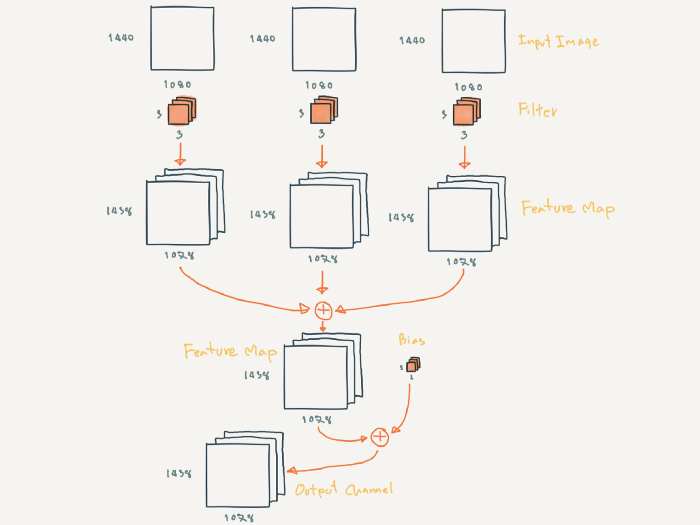

In [7]:
model = Sequential()
model.add(Conv2D(3,    # number of filter layers
                (3,    # y dimension of kernel
                 3),   # x dimension of kernel
                 input_shape=cat.shape))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 690, 1438, 3)      84        
                                                                 
Total params: 84
Trainable params: 84
Non-trainable params: 0
_________________________________________________________________


In [9]:
model = Sequential()
model.add(Conv2D(3,(10,10),input_shape=cat.shape))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 683, 1431, 3)      903       
                                                                 
Total params: 903
Trainable params: 903
Non-trainable params: 0
_________________________________________________________________


ทดลองขยายมิติของภาพจาก 3 มิติเป็น 4 มิติ เพื่อเตรียมนำเข้า Predict Function โดยเลขตัวแรกคือจำนวนภาพ มี 1 ภาพ

In [11]:
cat_batch = np.expand_dims(cat,axis=0) #ขยายมิติของภาพจาก 3 มิติเป็น 4 มิติ
cat_batch.shape
#(1, 692, 1440, 3) 1 => จำนวนภาพ

(1, 692, 1440, 3)

ทดลอง predict Model โดยใช้ค่า Weight และ Bias แบบสุ่มในตอนเริ่มต้น โดยยังไม่มีการ Train Model

In [12]:
conv_cat = model.predict(cat_batch)
conv_cat.shape


1/1 [==============================] - 1s 756ms/step


(1, 683, 1431, 3)

เนื่องจากเรามีการนิยาม Model โดยกำหนดจำนวน Filter ไว้ที่ 3 Filter ดังนั้นจึงทำให้ได้ Output Channel   ทั้งหมด 3 Channel ซึ่งขนาดของ Output Channel จะลดลงจากเดิม 1  เนื่องมาจาก มีการ Slide Kernel ขนาด 3x3 ไปบน Input Image โดยไม่มีการทำ Padding

นิยาม **visualize_cat Function** ที่รับภาพเป็น Matrix, ขยายภาพเป็น 4 มิติ แล้ว Predict ภาพ ก่อนจะหดให้เหลือ 3 มิติเท่าเดิมเพื่อจะ Plot ภาพต่อไป

In [13]:
def visualize_cat(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat = model.predict(cat_batch)
    print (conv_cat)
    #^ สิ่งที่ model เห็น
    conv_cat = np.squeeze(conv_cat, axis=0)
    print(conv_cat.shape)
    conv_cat = cv2.cvtColor(conv_cat, cv2.COLOR_RGB2BGR)
    plt.imshow(conv_cat)

1/1 [==============================] - 0s 489ms/step


[[[[ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   ...
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]]

  [[ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   ...
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]]

  [[ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   ...
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]]

  ...

  [[ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   ...
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]
   [ 120.11427  -68.5057  -202.06601]]

  [[ 120.11427  -68.5057  -202.06601]
   [ 12

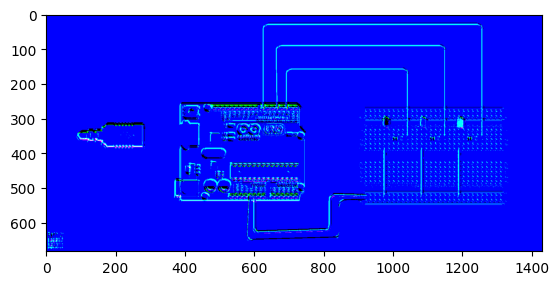

In [14]:
visualize_cat(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image   แบบ 3 Channel โดยมี Filter ขนาด 3 x 3 จำนวน 1 Filter

In [23]:
model = Sequential()
model.add(Conv2D(1,(5,5),input_shape=cat.shape))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 688, 1436, 1)      76        
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________


ทดลอง visualize ภาพโดยใช้แบบ 3 มิติแล้ว plot

1/1 [==============================] - 0s 221ms/step


[[[[-67.295334]
   [-67.295334]
   [-67.295334]
   ...
   [-67.295334]
   [-67.295334]
   [-67.295334]]

  [[-67.295334]
   [-67.295334]
   [-67.295334]
   ...
   [-67.295334]
   [-67.295334]
   [-67.295334]]

  [[-67.295334]
   [-67.295334]
   [-67.295334]
   ...
   [-67.295334]
   [-67.295334]
   [-67.295334]]

  ...

  [[-67.295334]
   [-67.295334]
   [-67.295334]
   ...
   [-67.295334]
   [-67.295334]
   [-67.295334]]

  [[-67.295334]
   [-67.295334]
   [-67.295334]
   ...
   [-67.295334]
   [-67.295334]
   [-67.295334]]

  [[-67.295334]
   [-67.295334]
   [-67.295334]
   ...
   [-67.295334]
   [-67.295334]
   [-67.295334]]]]
(688, 1436, 1)


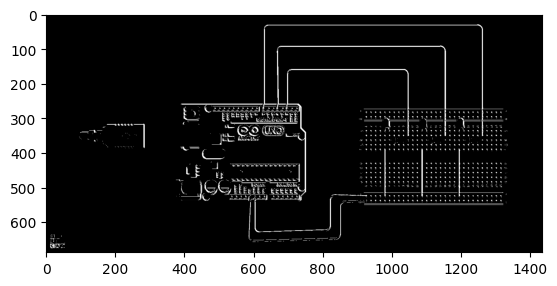

In [24]:
visualize_cat(model, cat)

# นิยาม  visualize_cat_one_channel Function ที่รับภาพเป็น Matrix ขยายภาพเป็น 4 มิติ แล้ว Predict ภาพ ก่อนจะหดให้เหลือ 2 มิติ เพื่อจะ Plot ภาพ แบบ 1 Channel ต่อไป

In [31]:
def visualize_cat_one_channel(model, cat):
    cat_batch = np.expand_dims(cat,axis=0)
    conv_cat2 = model.predict(cat_batch)
    conv_cat2 = np.squeeze(conv_cat2, axis=0)
    conv_cat2 = conv_cat2.reshape(conv_cat2.shape[:2])
    plt.imshow(conv_cat2)


1/1 [==============================] - 1s 708ms/step


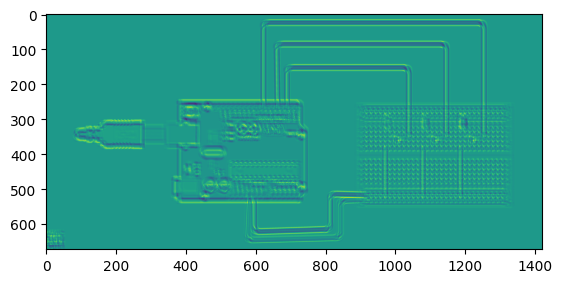

In [32]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image  แบบ 3 Channel โดยมี Filter ขนาด 20 x 20 จำนวน 1 Filter

In [27]:
model = Sequential()
model.add(Conv2D(1,(20,20),input_shape=cat.shape))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 673, 1421, 1)      1201      
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 1s 709ms/step


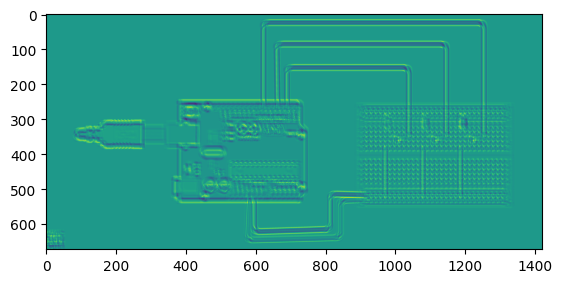

In [33]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image ขนาด 1,440x1,080 Pixel แบบ 3 Channel โดยมี Filter ขนาด 20 x 20 จำนวน 1 Filter และ เพิ่ม ReLu Activation Function

In [25]:
model = Sequential()
model.add(Conv2D(1,(20,20),input_shape=cat.shape))
model.add(Activation('relu'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 673, 1421, 1)      1201      
                                                                 
 activation (Activation)     (None, 673, 1421, 1)      0         
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 1s 1s/step


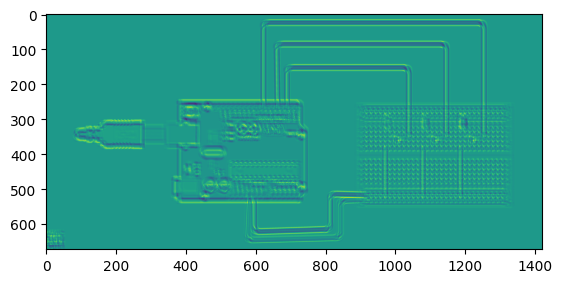

In [34]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution โดยรับ Input Image แบบ 3 Channel โดยมี Filter ขนาด 3 x 3 จำนวน 1 Filter และ เพิ่ม Max Pooling ขนาด 5 x 5

In [35]:
model = Sequential()
model.add(Conv2D(1,(3,3),input_shape=cat.shape))
model.add(MaxPooling2D(pool_size=(5,5)))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 690, 1438, 1)      28        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 138, 287, 1)      0         
 )                                                               
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 215ms/step


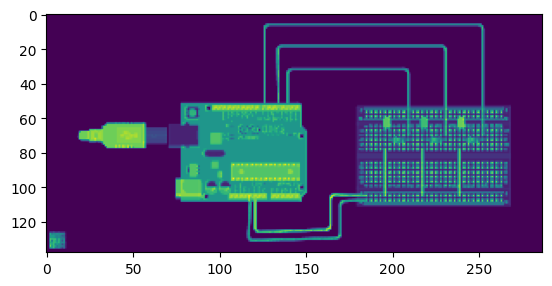

In [36]:
visualize_cat_one_channel(model, cat)

นิยาม Model แบบ 2D Convolution, ReLu Activation Function และ Max Pooling อย่างละ 2 Layer

In [59]:
model = Sequential()
model.add(Conv2D(1,(3,3),input_shape=cat.shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(1,(3,2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,1)))
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 690, 1438, 1)      28        
                                                                 
 activation_23 (Activation)  (None, 690, 1438, 1)      0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 230, 479, 1)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 228, 478, 1)       7         
                                                                 
 activation_24 (Activation)  (None, 228, 478, 1)       0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 114, 478, 1)      0         
 g2D)                                                

1/1 [==============================] - 0s 211ms/step


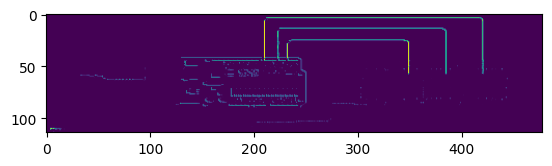

In [60]:
visualize_cat_one_channel(model, cat)